# Gaussian R-XOR and Gaussian XNOR Experiments: Streaming vs. Batch Forests

In [1]:
import numpy as np
import streaming_synf_functions as fn
from proglearn.sims import generate_gaussian_parity
from proglearn.forest import LifelongClassificationForest


Note: This notebook uses external functions stored in `streaming_synf_functions.py`

## Using the `update_task` function for streaming data

Current standard implementations of decision forests operate in batch mode. In many real world applications, we are not provided with all data at once and therefore need to incrementally update as data arrives. For incrementally updating decision trees we can use the [scikit-learn-stream fork](https://github.com/PSSF23/scikit-learn-stream) with an added `partial_fit` function for incremental learning. Furthermore, for synergistic learning we can use the function `update_task`. When new data, $x$, arrives with labels, $y$, we can update task $t$ as follows:

`synf.update_task(x,y,task_id = t)`





## Synergistic Learning

The goal of synergistic learning is to improve performance on the current task as well as past and future tasks. This can be accomplished through ensembling independent representations, as is done in both Synergistic Forest implementations. 

The metric of learning efficiency, as described in Vogelstein et al. 2020, can be used to quantify a classifier's learning abilities. 

The **learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{LE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{LE}^t_n(f) > 1$, $f$ has learned task $t$ with data $\mathbf{S}_n$

The **forward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{FLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}$$

If $\text{FLE}^t_n(f) > 1$, $f$ has leveraged data from past tasks to improve performance on task $t$

The **backward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{BLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{BLE}^t_n(f) > 1$, $f$ has leveraged data from future tasks to improve performance on previous tasks

An algorithm has **synergistically learned** if $\log\text{LE}^t_n(f) > 0$ for all $t \in \mathcal{T}$ 

Conversely, an algorithm has **catastrophically forgotten** if it has negatively learned for all tasks

## Running the Gaussian XOR experiments

In the following experiments, we compare Decision Forest, Stream Decision Forest, Synergistic Forest, and Stream Synergistic Forest on variations of the Gaussian XOR binary classification task. 

In [6]:
mc_rep = 10
fn.run_gaussian_experiments(mc_rep)

## Load results for plotting

In [ ]:
rxor_mean_errors, xnor_mean_errors, rxor_single_task_errors, xnor_single_task_errors = fn.load_data()
r_xor_transfer_efficiencies = fn.get_mean_te(rxor_mean_errors, rxor_single_task_errors)
xnor_transfer_efficiencies = fn.get_mean_te(xnor_mean_errors, xnor_single_task_errors)

## Gaussian XOR and Gaussian XNOR
Here we use Gaussian XOR and Gaussian XNOR simulated data. Gaussian XNOR has the same distribution as Gaussian XOR, but with the class labels rotated 90 degrees. Therefore, XNOR has the same optimal discriminant boundary as XOR. We first introduce 750 samples of XOR followed by 750 samples of XNOR. Data are introduced in batches of 25 samples at a time.

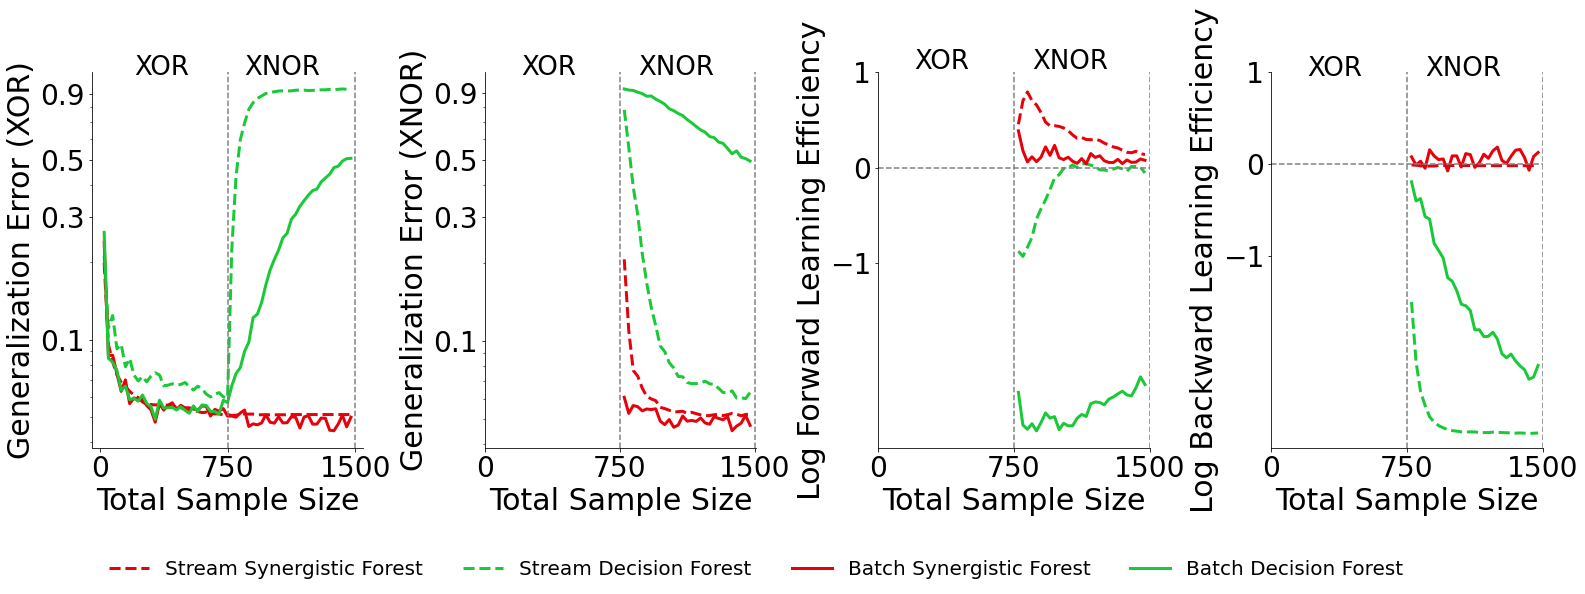

In [8]:
fn.plot_error(np.array(xnor_mean_errors), "XNOR", np.log(xnor_transfer_efficiencies))

## Gaussian XOR and Gaussian R-XOR
Here we use Gaussian XOR and Gaussian R-XOR simulated data. Gaussian R-XOR has the same distribution as Gaussian XOR, but with the class labels rotated 45 degrees. We introduce 750 samples of XOR data followed by 750 samples of R-XOR data. Data are introduced in batches of 25 samples at a time.



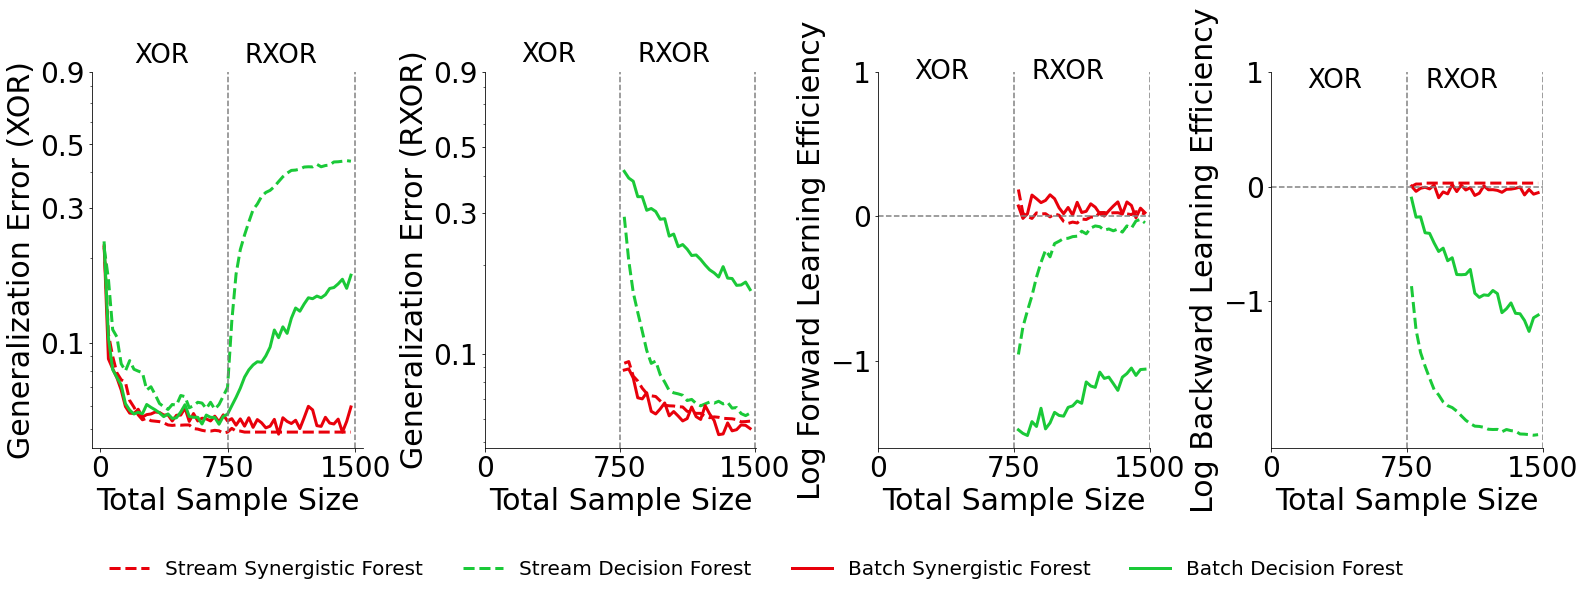

In [9]:
fn.plot_error(np.array(rxor_mean_errors), "RXOR", np.log(r_xor_transfer_efficiencies))

## Backwards Learning Efficiency and Angle of Rotation

In [4]:
angle_sweep = range(0, 90, 1)
task1_sample = 100
task2_sample = 100
mc_rep = 10  # reduce the number of repetitions for reduced runtime

In [5]:
mean_te = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep)

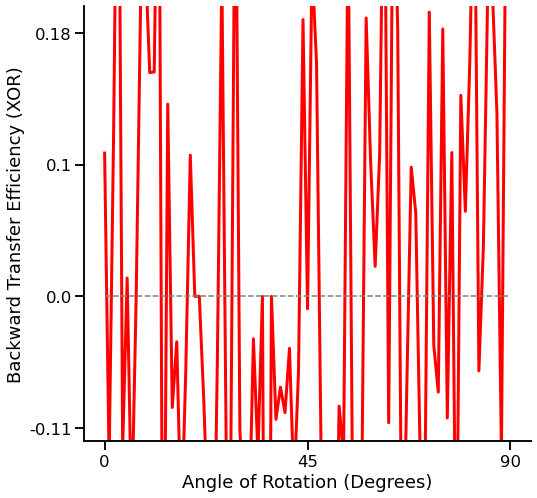

In [6]:
fn.plot_bte_v_angle(mean_te)